# Perceptron
- Este código implementa un perceptrón para resolver el problema de clasificación de la compuerta lógica AND.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_perceptron_decision_boundary(X, y, w, b):
    # Cálculo de los límites del gráfico
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001), np.arange(y_min, y_max, 0.001))

    # Cálculo de la predicción del perceptrón en cada punto del gráfico
    Z = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)

    # Gráfico de los puntos de datos y la frontera de decisión
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

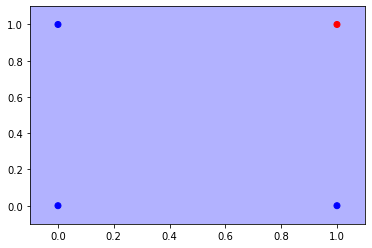

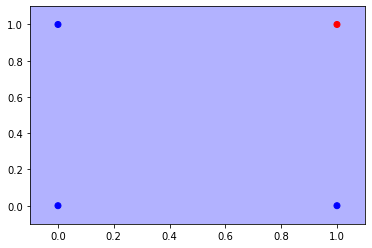

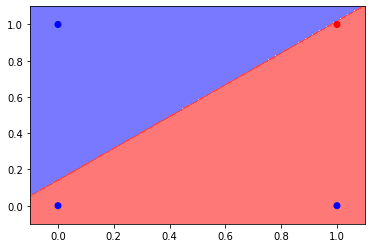

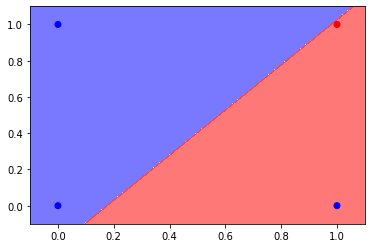

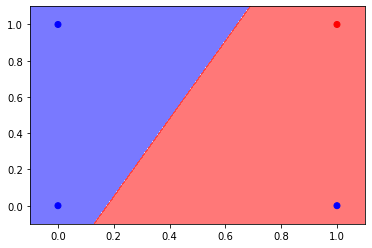

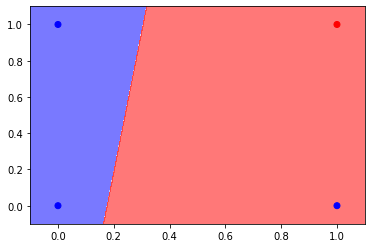

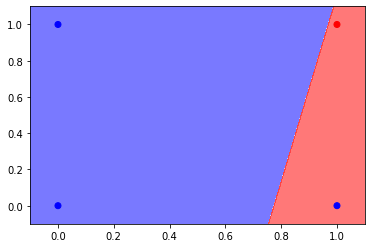

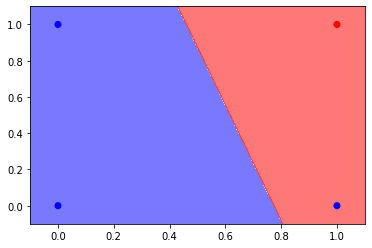

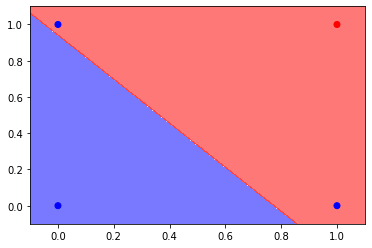

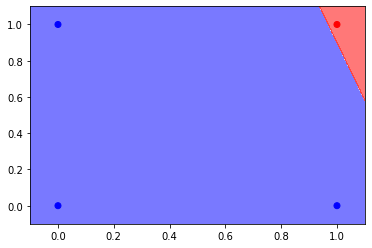

Entrada: [0 0], Salida: 1.0
Entrada: [0 1], Salida: 1.0
Entrada: [1 0], Salida: 1.0
Entrada: [1 1], Salida: -1.0


In [2]:
# Datos de entrada (entradas x1 y x2 de la compuerta AND)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Etiquetas de salida (salidas y de la compuerta AND)
y = np.array([-1, -1, -1, 1])

# Inicialización aleatoria de los pesos y el sesgo
np.random.seed(42)
w = np.random.randn(2)
b = np.random.randn()

# Función de activación (signo)
def activation_function(z):
    return np.sign(z)

# Función de entrenamiento del perceptrón
def train_perceptron(X, y, w, b, learning_rate, epochs):
    for epoch in range(epochs):
        plot_perceptron_decision_boundary(X, y, w, b)
        for i in range(len(X)):
            # Cálculo de la distancia del perceptrón
            z = (np.dot(X[i], w) + b) * y[i]
            y_pred = activation_function(z)

            # Actualización de los pesos y el sesgo si hay un error
            if y_pred != 1:
                w += learning_rate * y[i] * X[i]
                b += learning_rate * y[i]
    return w, b

# Entrenamiento del perceptrón
w, b = train_perceptron(X, y, w, b, learning_rate=0.1, epochs=10)

# Prueba del perceptrón
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for x in test_data:
    z = (np.dot(x, w) + b) * y[0]
    y_pred = activation_function(z)
    print(f"Entrada: {x}, Salida: {y_pred}")
